In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Importing data
data_x = np.genfromtxt('../data/q3/logisticX.csv', delimiter=',')
data_y = np.genfromtxt('../data/q3/logisticY.csv', delimiter=',')
data_y = data_y.reshape(-1,1)

#Normalizing the vector data_X
mean = np.mean(data_x, axis = 0).reshape(1,-1)
std = np.std(data_x, axis = 0).reshape(1,-1)
norm_x = (data_x-mean)/std #normalized data_x

#size of dataset
(m,n) = data_x.shape

#Adding the intercept term to norm _x
intercept = np.ones(m).reshape(-1,1)
data_x = np.concatenate((intercept, norm_x), axis=1)
#Now the training data is data_x(mXn) and data_y(mX1)

data_x_trans = data_x.T
#size of dataset
(m,n) = data_x.shape

In [2]:
#Helper functions

#Sigmoid of a given value
#z should be np array
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Prediction of values given theta and input values
def prediction(theta, x):
    return np.matmul(x,theta)

#To calculate the subtraction term in Newton's method, given a theta, the function first calculates hessian,
# and first order derivative, takes inverse of hessian and multiplies it with the later to give the result
def term(theta):
    pred = sigmoid(prediction(theta,data_x))
    error = (data_y-pred)
    first_der = np.matmul(data_x_trans,error)
    hessian = np.zeros((n,n))
    for i in range(m):
        p = pred[i][0]
        x = data_x[i]
        l = p*(p-1)*np.matmul(x.reshape(-1,1),x.reshape(1,-1))
        hessian = hessian + l
    second_der = np.linalg.pinv(hessian)
    return np.matmul(second_der, first_der)

In [3]:
#Part (a)
#The parameter Vector theta and initializing it
theta = np.zeros(n).reshape(-1,1)

progress = []
for i in range(1000):
    t  = term(theta)
    #to compare it with old value of theta 
    newtheta = theta - t
    flag = 0
    #The convergence criteria, if all the elements of parameter don't change by 10^-7 then theta has converged
    for eps in (newtheta-theta):
        if(eps[0]>0.0000001):
            flag = 1
    if(flag==1):
        theta = newtheta
    else:
        break
print("The value of parameters learnt is:")
print(theta)

The value of parameters learnt is:
[[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]]


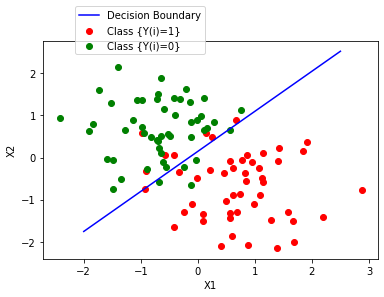

In [15]:
#Part(b)

#Segretaing in two different classes based on value of y(i)
class1 = np.argwhere(data_y==1)[:,0]
class0 = np.argwhere(data_y==0)[:,0]
class1_x1 = data_x[class1,1]
class1_x2 = data_x[class1,2]
class0_x1 = data_x[class0,1]
class0_x2 = data_x[class0,2]

#Plotting the two different classes and their decision boundary as indicated by theta learnt above
plt.figure(1)
plt.scatter(class1_x1, class1_x2, c="red", label = 'Class {Y(i)=1}')
plt.scatter(class0_x1, class0_x2, c="green", label = 'Class {Y(i)=0}')
x = np.linspace(-2.0,2.5,100)
y = (theta[0][0] + theta[1][0]*x)/(-1*theta[2][0])
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x,y,'-b', label='Decision Boundary')
plt.legend(loc='right', bbox_to_anchor=(0.5, 1.05))
plt.show()